In [ ]:
# This code explores the NBA players from 2013 - 2014 basketball season, and 
# uses a machine learning algorithm called KMeans to group them in clusters,
# this will show which players are most similar

In [ ]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the data
from google.colab import files
uploaded = files.upload()


In [ ]:
nbaplayers = pd.read_csv('2013-2014 NBA Players Stats - Sheet1 (1).csv')

In [ ]:
nbaplayers.head(10)

,PLAYER,TEAM,POS,AGE,GP,MPG,MIN%,USG%,TOr,FTA,FT%,2PA,2P%,3PA,3P%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
0,Quincy Acy,Tor,SF,23,7,8.5,15.3,14.9,0.102,8,0.625,9,0.444,5,0.400,0.542,2.7,2.1,14.7,0.6,10.3,0.57,0.43,7.1
1,Quincy Acy,Sac,SF,23,56,13.9,28.6,9.9,0.160,45,0.667,117,0.496,10,0.200,0.518,2.7,3.6,14.5,0.4,4.5,0.34,0.41,4.5
2,Steven Adams,Okc,C,20,81,14.6,30.2,11.8,0.225,136,0.581,185,0.503,0,0.000,0.541,3.3,4.1,15.8,0.5,5.1,0.49,0.70,5.2
3,Jeff Adrien,Cha,PF,27,25,10.1,20.3,10.8,0.136,25,0.520,40,0.550,0,0.000,0.559,2.3,3.5,19.7,0.3,4.2,0.28,0.60,5.3
4,Jeff Adrien,Mil,PF,27,28,25.0,50.6,19.9,0.101,94,0.670,235,0.515,0,0.000,0.552,10.9,7.8,17.9,1.1,7.8,0.61,0.75,7.3
5,Arron Afflalo,Orl,SG,28,73,34.8,71.3,23.4,0.112,336,0.815,711,0.473,300,0.427,0.574,18.2,3.6,5.8,3.4,17.0,0.48,0.04,7.0
6,Alexis Ajinca,Nor,C,25,56,16.8,34.5,16.5,0.184,67,0.836,249,0.546,1,0.000,0.587,5.9,4.9,17.1,0.7,6.7,0.41,0.82,6.5
7,Cole Aldrich,Nyk,C,25,46,6.9,14.2,13.4,0.195,30,0.867,61,0.541,0,0.000,0.620,2.0,2.8,23.7,0.3,6.6,0.17,0.65,6.9
8,LaMarcus Aldridge,Por,PF,28,69,36.0,74.3,29.9,0.072,360,0.822,1408,0.461,15,0.200,0.507,23.2,11.1,16.6,2.6,13.1,0.93,1.00,9.7
9,Lavoy Allen,Phi,PF,24,51,18.7,38.3,14.4,0.127,40,0.675,252,0.456,13,0.154,0.465,5.2,5.4,15.7,1.3,10.4,0.43,0.53,7.1


In [ ]:
# Find the average of every column of the dataframe
nbaplayers.mean()

AGE      26.610000
GP       49.224000
MPG      20.248800
MIN%     41.359400
USG%     18.568800
TOr       0.143858
FTA     112.612000
FT%       0.709362
2PA     293.314000
2P%       0.465572
3PA     102.806000
3P%       0.255016
TS%       0.516090
PPG       8.206400
RPG       3.595000
TRB%     10.143800
APG       1.826000
AST%     12.931400
SPG       0.638920
BPG       0.395060
VI        6.214000
dtype: float64

In [ ]:
# Get the mean/average of specific column
nbaplayers.loc[:, 'FTA'].mean()

112.612

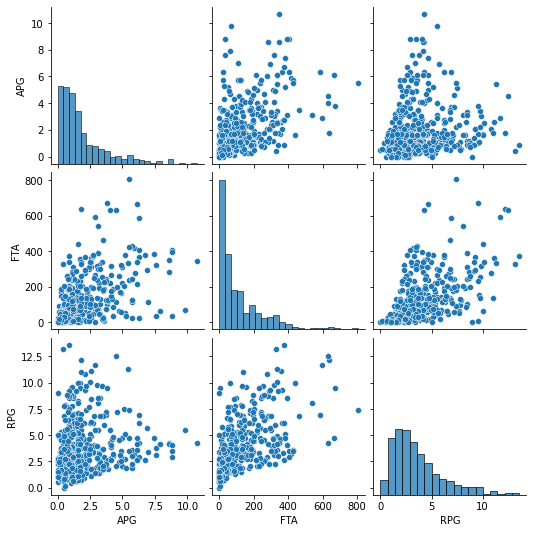

In [ ]:
# Make a pairwise scatter plot
sns.pairplot(nbaplayers[["APG", "FTA", "RPG"]])

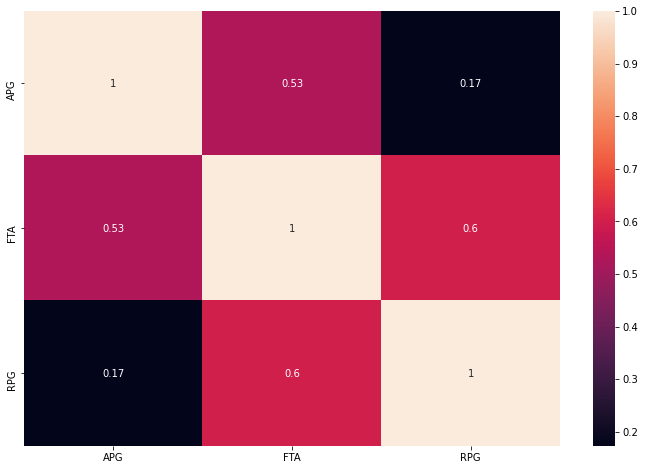

In [ ]:
# Make Heat map to see correlations between the different stat categories
plt.subplots(figsize=(12,8))
correlation = nbaplayers[['APG', 'FTA', 'RPG']].corr()
sns.heatmap(correlation, annot=True)


In [ ]:
# Make the cluster of players using kMeans
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=9, random_state=1)

# Get numeric data and remove columns with missing data
good_columns = nbaplayers._get_numeric_data().dropna(axis=1)

In [ ]:
kmeans_model.fit(good_columns) # Train the model
labels = kmeans_model.labels_ # Get the labels or cluster label for each player

In [ ]:
labels

array([0, 3, 3, 0, 3, 7, 3, 0, 2, 3, 0, 4, 8, 8, 0, 8, 4, 1, 4, 8, 2, 0,
       4, 1, 0, 8, 3, 0, 1, 0, 3, 0, 0, 3, 1, 8, 1, 4, 3, 6, 4, 1, 3, 4,
       3, 0, 3, 7, 8, 1, 3, 4, 0, 0, 3, 8, 3, 0, 6, 8, 0, 8, 0, 8, 5, 6,
       6, 8, 6, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 6, 4, 3, 1, 0, 0, 3,
       0, 8, 3, 1, 4, 0, 1, 1, 5, 4, 1, 8, 1, 0, 0, 3, 0, 0, 0, 4, 0, 6,
       3, 7, 0, 2, 0, 7, 4, 3, 4, 8, 0, 0, 7, 8, 0, 0, 3, 5, 8, 8, 0, 0,
       0, 0, 0, 0, 4, 8, 8, 2, 8, 3, 0, 0, 3, 7, 5, 4, 5, 1, 2, 0, 0, 2,
       0, 8, 0, 0, 5, 5, 4, 3, 5, 0, 1, 0, 4, 4, 1, 0, 3, 0, 3, 1, 4, 8,
       3, 6, 5, 8, 6, 3, 7, 5, 1, 0, 0, 3, 3, 0, 1, 5, 3, 0, 0, 4, 4, 1,
       7, 3, 2, 0, 3, 0, 0, 3, 1, 7, 8, 0, 3, 3, 0, 0, 0, 6, 3, 1, 3, 0,
       0, 7, 5, 8, 6, 5, 6, 6, 1, 6, 0, 1, 8, 0, 8, 5, 3, 8, 5, 4, 8, 7,
       1, 6, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 7, 3, 6, 3, 3, 7, 0, 0, 1, 0,
       3, 0, 6, 6, 3, 8, 5, 0, 4, 8, 3, 7, 4, 8, 0, 1, 0, 3, 6, 3, 4, 5,
       0, 1, 0, 3, 3, 7, 1, 8, 3, 6, 7, 7, 3, 4, 3,

<function matplotlib.pyplot.show>

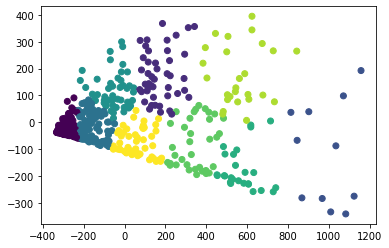

In [ ]:
# Plot players by cluster
# Reduce dimensionality algorithm
from sklearn.decomposition import PCA
pca_2 = PCA(2)
plot_columns = pca_2.fit_transform(good_columns)
# plot_columns
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=labels)
plt.show

In [ ]:
# Find player LeBron James
lbj = good_columns.loc[ nbaplayers['PLAYER'] == 'LeBron James',: ]
lbj

,AGE,GP,MPG,MIN%,USG%,TOr,FTA,FT%,2PA,2P%,3PA,3P%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
246,29,77,37.5,77.3,31.2,0.144,585,0.75,1047,0.622,306,0.379,27.1,6.9,11.6,6.3,32.2,1.57,0.34,11.3


In [ ]:
# Find player Kevin Durant
kdurant = good_columns.loc[ nbaplayers['PLAYER'] == 'Kevin Durant',: ]
kdurant

,AGE,GP,MPG,MIN%,USG%,TOr,FTA,FT%,2PA,2P%,3PA,3P%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
150,25,81,38.4,79.4,33.2,0.122,805,0.873,1197,0.549,491,0.391,32.0,7.4,10.9,5.5,26.9,1.27,0.73,11.4


In [ ]:
# Converting models into lists for model prediction
lbj_list = lbj.values.tolist()
kd_list = kdurant.values.tolist()

lbj_cluster = kmeans_model.predict(lbj_list) # LeBron belongs to cluster 0

In [ ]:
kd_cluster = kmeans_model.predict(kd_list) # Kevin Durant belongs to cluster 0

In [ ]:
# Print the cluster label
print(lbj_cluster)
print(kd_cluster)

[2]
[2]


In [ ]:
nbaplayers.corr()

,AGE,GP,MPG,MIN%,USG%,TOr,FTA,FT%,2PA,2P%,3PA,3P%,TS%,PPG,RPG,TRB%,APG,AST%,SPG,BPG,VI
AGE,1.000000,-0.030985,0.054285,0.053335,-0.103735,0.064011,-0.067790,0.001076,-0.047588,-0.023082,0.009437,0.021582,0.071713,-0.004592,0.003980,-0.034563,0.075295,0.091875,-0.001953,-0.015499,0.027078
GP,-0.030985,1.000000,0.618159,0.641391,0.203702,-0.182848,0.635622,0.301342,0.711612,0.307560,0.547752,0.142198,0.399827,0.527965,0.434146,0.033264,0.332967,0.144965,0.462087,0.269252,0.401424
MPG,0.054285,0.618159,1.000000,0.998318,0.461272,-0.228174,0.757082,0.328592,0.801668,0.232326,0.598991,0.220784,0.372803,0.904458,0.646666,-0.041349,0.669803,0.374581,0.739022,0.347244,0.556594
MIN%,0.053335,0.641391,0.998318,1.000000,0.457635,-0.225158,0.763014,0.345009,0.808888,0.246551,0.605604,0.221369,0.383184,0.902770,0.643304,-0.044683,0.671530,0.378691,0.740275,0.343494,0.570561
USG%,-0.103735,0.203702,0.461272,0.457635,1.000000,-0.192769,0.542056,0.342089,0.567140,0.083205,0.315886,0.273699,0.206007,0.709713,0.298635,-0.035824,0.435229,0.405966,0.341106,0.081367,0.635961
TOr,0.064011,-0.182848,-0.228174,-0.225158,-0.192769,1.000000,-0.145889,-0.225729,-0.200733,-0.085304,-0.211826,-0.179866,-0.092763,-0.256924,-0.128276,0.067713,0.061888,0.188436,-0.103257,-0.098109,-0.076968
FTA,-0.067790,0.635622,0.757082,0.763014,0.542056,-0.145889,1.000000,0.218704,0.895627,0.237835,0.482070,0.086274,0.344086,0.850888,0.600921,0.090814,0.533976,0.306588,0.605187,0.327841,0.561091
FT%,0.001076,0.301342,0.328592,0.345009,0.342089,-0.225729,0.218704,1.000000,0.240986,0.029034,0.342939,0.302063,0.370087,0.357462,0.041417,-0.236801,0.285327,0.256554,0.207602,-0.085422,0.440957
2PA,-0.047588,0.711612,0.801668,0.808888,0.567140,-0.200733,0.895627,0.240986,1.000000,0.236995,0.416774,0.065938,0.304378,0.857858,0.678847,0.135334,0.502702,0.276187,0.576193,0.395982,0.582228
2P%,-0.023082,0.307560,0.232326,0.246551,0.083205,-0.085304,0.237835,0.029034,0.236995,1.000000,0.056956,-0.127333,0.555026,0.227722,0.325152,0.248919,0.024148,-0.082796,0.109296,0.285755,0.222647


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(nbaplayers[['MPG']], nbaplayers[['PPG']], test_size=0.2, random_state=2)

In [ ]:
# Create the Linear Regression Model
# Predict the points per game for each player from the minutes per game
lr = LinearRegression()
lr.fit(x_train, y_train) #training the model
predictions = lr.predict(x_test) # Make predictions on test data

print(predictions) # Print the predictions
print(y_test) # Print the actual values

[[13.3896692 ]
 [ 4.06131857]
 [10.189828  ]
 [ 3.6816764 ]
 [13.17273081]
 [ 1.45805794]
 [ 4.71213373]
 [ 6.98998679]
 [ 1.02418116]
 [ 5.03754131]
 [ 4.98330672]
 [ 5.68835647]
 [ 4.22402236]
 [ 1.51229253]
 [13.76931137]
 [15.61328766]
 [ 8.34585171]
 [ 2.65121906]
 [15.23364548]
 [ 5.09177591]
 [10.29829719]
 [ 7.26115978]
 [ 1.24111955]
 [12.25074267]
 [14.47436113]
 [ 0.80724278]
 [16.643745  ]
 [ 8.02044413]
 [ 8.72549389]
 [18.05384451]
 [13.82354597]
 [ 0.10219302]
 [10.62370477]
 [ 5.85106026]
 [13.01002702]
 [ 2.59698447]
 [ 8.18314792]
 [11.11181614]
 [ 2.43428068]
 [ 4.87483752]
 [14.09471895]
 [ 0.59030439]
 [14.9082379 ]
 [18.05384451]
 [ 5.52565268]
 [ 1.62076173]
 [ 3.46473801]
 [ 6.06799865]
 [ 4.44096075]
 [14.31165734]
 [ 8.61702469]
 [16.48104121]
 [14.74553411]
 [12.79308863]
 [ 4.98330672]
 [ 4.16978777]
 [ 6.61034462]
 [ 7.58656736]
 [10.51523558]
 [11.54569291]
 [ 8.07467873]
 [16.04716443]
 [ 6.98998679]
 [13.3354346 ]
 [10.1355934 ]
 [12.68461944]
 [16.80644

In [ ]:
# Test Model: Score returns the coefficient of determination R^2 of the prediction
lr_confidence = lr.score(x_test, y_test)
print('lr confidence: ', lr_confidence)

lr confidence:  0.8308902488812061


With a linear regression confidence of 0.83089, a very high percentage of variance in the PPG can be attributed to the MPG.